$$NWRITE = \{250, 500 \}$$

I used NWRITE = 250 to write data every ps for the simulations in Q2 and Q3.

$$dt = 0.004$$

Total run time was varied using 

$$\frac{t_{total}}{dt} = NSTEPS$$

I changed `Main.f90`, `Write.f90`, and `GlobalVars.f90` in the `src` folder to add `DR` and `R_OLD`.

The code and the `src` folder is located in https://github.com/mohan-s1/uva/tree/main/atomistic_sims/hw6

In [330]:
import os
import glob

# Get all files in the "data" directory that match the pattern
all_files = sorted(glob.glob("data_1000/time*.d")) # x in data_x denotes total run time in picoseconds

# Extract numbers by splitting the filename and converting to integers
all_numbers = [int(f.split("time")[1].split(".d")[0]) for f in all_files] # these will be our times for the MSD plot

# Sort both lists based on the numeric values
all_files.sort(key=lambda x: int(x.split("time")[1].split(".d")[0]))

# print(all_files)
# print(all_numbers) # times in ps (i.e. 0 ps, 2 ps, ..., 100 ps) since I write every 500 and have a dt = 0.004 --> 500 * 0.004 [ps] = write every 2 [ps]

In [331]:
import numpy as np
import matplotlib.pyplot as plt

x_index = 2
y_index = 3
z_index = 4

x_disp_index = 12
y_disp_index = 13
z_disp_index = 14

msd_values = []
run_time = []

for i, file in enumerate(all_files):

    run_time.append(all_numbers[i])
    
    data = np.loadtxt(file)

    x_disp = data[:, x_disp_index]
    y_disp = data[:, y_disp_index]
    z_disp = data[:, z_disp_index]

    squared_disp = x_disp**2 + y_disp**2 + z_disp**2

    msd = np.mean(squared_disp)
    msd_values.append(msd)


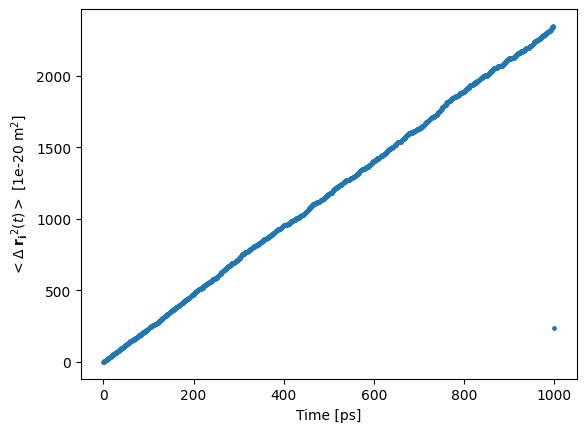

In [332]:
# Convert to numpy arrays
time_steps = np.asarray(run_time[0:-1])
msd_values = np.asarray(msd_values[0:-1])

plt.scatter(time_steps, msd_values, s = 6)
plt.xlabel("Time [ps]")
plt.ylabel(r"$<{\Delta \; \mathbf{r_i}^2 (t)}>$ [1e-20 m$^2$]")
plt.show();

$$ MSD = \braket{\Delta \mathbf{r}^2 (t)} = A + 6Dt + \delta $$

where $\delta$ denotes fluctuations

In [333]:
slope, intercept = np.polyfit(time_steps, msd_values, 1)  # Linear fit: polyfit returns degree, degree - 1, degree - 2, ..., 0 

D = slope/6

a2_per_pico_to_cm2_per_second = 10**(-4)

print(f"My diffusion coefficient is {D} Angstrom^2 per picosecond")
print(f"or {D*a2_per_pico_to_cm2_per_second:.3e} cm^2 per second")

My diffusion coefficient is 0.38834376161948203 Angstrom^2 per picosecond
or 3.883e-05 cm^2 per second


# Question 3

In [334]:
pcle_of_interest = 11 # arbitrarily choose 12th particle

x_index = 2
y_index = 3
z_index = 4

# intialize arrays for x, y, z positions with same dimensions as time array
x_positions = np.empty_like(np.asarray(run_time), dtype=np.float32)
y_positions = np.empty_like(np.asarray(run_time), dtype=np.float32)
z_positions = np.empty_like(np.asarray(run_time), dtype=np.float32)

for i, file in enumerate(all_files):
    
    data = np.loadtxt(file)

    x = data[pcle_of_interest, x_index]
    y = data[pcle_of_interest, y_index]
    z = data[pcle_of_interest, z_index]

    x_positions[i] = x
    y_positions[i] = y
    z_positions[i] = z

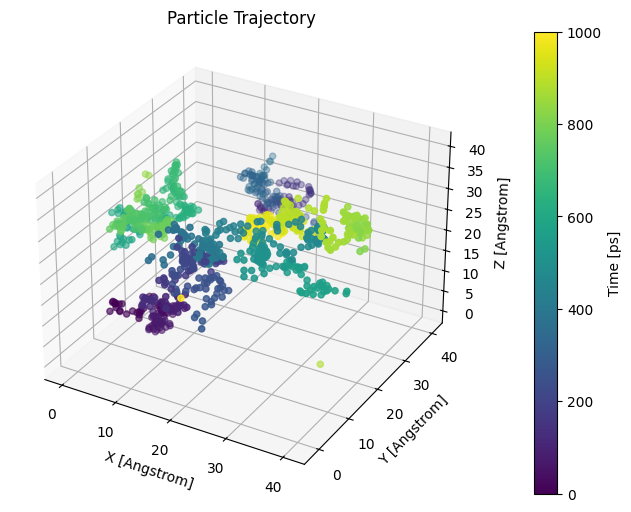

In [335]:
# Create 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with time as color
sc = ax.scatter(x_positions, y_positions, z_positions, c=run_time, cmap='viridis', marker='o')

# Colorbar to indicate time progression
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label("Time [ps]")

# Labels
ax.set_xlabel("X [Angstrom]")
ax.set_ylabel("Y [Angstrom]")
ax.set_zlabel("Z [Angstrom]")
ax.set_title("Particle Trajectory")

plt.show()


Not gonna lie, I asked an LLM to help me add lines and make the plot equal aspect ratio

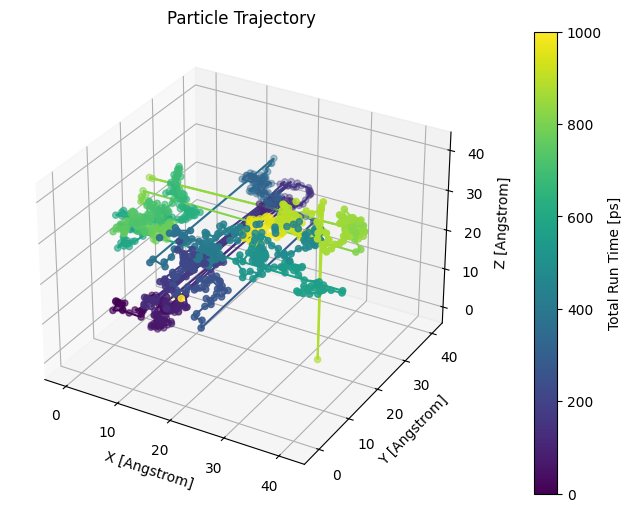

In [336]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import matplotlib.colors as mcolors

x, y, z = x_positions, y_positions, z_positions

# Create 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Create line segments
points = np.array([x, y, z]).T.reshape(-1, 1, 3)
segments = np.concatenate([points[:-1], points[1:]], axis=1)  # Pairs of points

# Create line collection with colors
norm = plt.Normalize(np.asarray(run_time).min(), np.asarray(run_time).max())
colors = plt.cm.viridis(norm(run_time[:-1]))  # Map time to colors
lc = Line3DCollection(segments, cmap='viridis', norm=norm)
lc.set_array(run_time[:-1])  # Set color values

# Add line collection to plot
ax.add_collection(lc)

# Scatter plot for individual points
sc = ax.scatter(x, y, z, c=run_time, cmap='viridis', marker='o')

# Colorbar
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label("Total Run Time [ps]")

# Labels
ax.set_xlabel("X [Angstrom]")
ax.set_ylabel("Y [Angstrom]")
ax.set_zlabel("Z [Angstrom]")
ax.set_title("Particle Trajectory")

# Function to set equal aspect ratio
def set_axes_equal(ax):
    """Sets equal aspect ratio for a 3D plot."""
    x_limits = ax.get_xlim()
    y_limits = ax.get_ylim()
    z_limits = ax.get_zlim()

    x_range = x_limits[1] - x_limits[0]
    y_range = y_limits[1] - y_limits[0]
    z_range = z_limits[1] - z_limits[0]

    max_range = max(x_range, y_range, z_range) / 2.0

    x_middle = np.mean(x_limits)
    y_middle = np.mean(y_limits)
    z_middle = np.mean(z_limits)

    ax.set_xlim(x_middle - max_range, x_middle + max_range)
    ax.set_ylim(y_middle - max_range, y_middle + max_range)
    ax.set_zlim(z_middle - max_range, z_middle + max_range)

# Apply equal aspect ratio
set_axes_equal(ax)

plt.show()

# Q2 and Q3 discussion

$$ \braket{x} = \sqrt{2 D t} $$

Given D = 0.388 $\r{A}^2 / ps \to \braket{x} = \sqrt{2 * 0.388 * 1000}  \sim 28 \r{A}$

Looking at the initial vs. final position, it does appear that the particle diffused $\sim 28 \r{A}$ over the full duration of the simulation (1000 ps).

# Question 4

The dimensions of the cell are ~20 $\r{A}$ in the radial directions and ~120 $\r{A}$ axially based on the lattice paramter (i.e. $5.78 \r{A} \cdot n$ where n is the number of layers). We know

$$ \braket{x} = \sqrt{2 D t} $$

so the we can find the total simulation run time by letting $\braket{x} = 120 \; \r{A}$ and solving for t since we want significant mixing in the axial direction. 

$$ 116 = \sqrt{2 D t} \to \; t \sim 17 \; ns$$

If we want to gather (i.e. choose Ngather) to avoid radial diffusion more than two box lengths, we can solve for t from

$$ 23 = \sqrt{2 D t} \to \; t \sim 0.7 \; ns$$

If we have a time step $dt = 0.004$ picoseconds, we need to gather slightly before reaching 0.7 ns, so 

$$\frac{688 \; ps}{0.004 \; ps} = 172056$$

In [337]:
a = 5.78 # Angstrom

axial_displacement = 20 * a

radial_displacement = 4 * a

time_step = 0.004 # picoseconds

total_time_needed = axial_displacement**2 / (2*D)

print(f"Given the diffusion coefficient D: {D} Angstrom^2 per picsecond")
print("--------------------------------------------------------------------------------")
print(f"Time needed for a axial displacement of `{axial_displacement:.1f}` Angstroms: `{total_time_needed:.2f}` picoseconds")
print(f"Time needed for a radial displacement of `{radial_displacement:.1f}` Angstroms: `{radial_displacement**2 / (2*D):.2f}` picoseconds")


print(f"Need `{total_time_needed/time_step:.0f}` total number of steps for the given time step `{time_step}` picoseconds to run for a total of `{total_time_needed:.0f}` picoseconds")
print(f"Need to call Ngather every `{(radial_displacement**2 / (2*D))/ time_step:.0f}` steps")

Given the diffusion coefficient D: 0.38834376161948203 Angstrom^2 per picsecond
--------------------------------------------------------------------------------
Time needed for a axial displacement of `115.6` Angstroms: `17205.58` picoseconds
Time needed for a radial displacement of `23.1` Angstroms: `688.22` picoseconds
Need `4301395` total number of steps for the given time step `0.004` picoseconds to run for a total of `17206` picoseconds
Need to call Ngather every `172056` steps


In [338]:
(total_time_needed/time_step)/250000

17.205580880547355

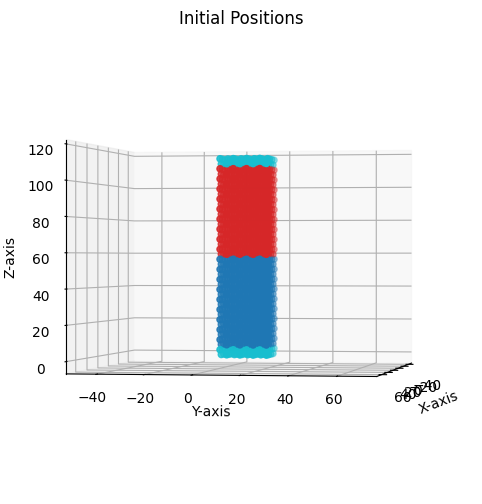

In [339]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

khist_index = 1

# Load initial position data
initial_position_data = np.loadtxt("q4/time000.d")
x_init = initial_position_data[:, 2]
y_init = initial_position_data[:, 3]
z_init = initial_position_data[:, 4]

pcle_id = initial_position_data[:, khist_index]  # Discrete values for coloring

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapping based on pcle_id
sc = ax.scatter(x_init, y_init, z_init, c=pcle_id, cmap='tab10', marker='o')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Initial Positions')

# Set equal aspect ratio
def set_axes_equal(ax):
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()
    
    x_range = x_limits[1] - x_limits[0]
    y_range = y_limits[1] - y_limits[0]
    z_range = z_limits[1] - z_limits[0]
    
    max_range = max(x_range, y_range, z_range)
    
    mid_x = np.mean(x_limits)
    mid_y = np.mean(y_limits)
    mid_z = np.mean(z_limits)
    
    ax.set_xlim3d([mid_x - max_range / 2, mid_x + max_range / 2])
    ax.set_ylim3d([mid_y - max_range / 2, mid_y + max_range / 2])
    ax.set_zlim3d([mid_z - max_range / 2, mid_z + max_range / 2])

set_axes_equal(ax)

# Function to update the view angle
def update(num):
    ax.view_init(elev=0, azim=10)
    return sc,

ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=100, blit=True)

plt.show()

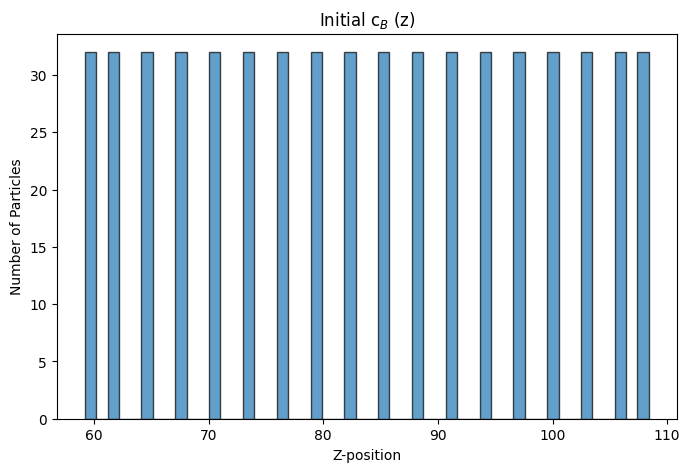

In [345]:
import numpy as np
import matplotlib.pyplot as plt

khist_index = 1

# Load initial position data
initial_position_data = np.loadtxt("q4/time000.d")
z_init = initial_position_data[:, 4]  # Extract z-coordinates
pcle_id = initial_position_data[:, khist_index]  # KHIST values

# Filter for KHIST = 1
z_filtered = z_init[pcle_id == 1]

# Create histogram
plt.figure(figsize=(8, 5))
plt.hist(z_filtered, bins=50, edgecolor='black', alpha=0.7)  # Adjust bin count as needed

# Labels and title
plt.xlabel('Z-position')
plt.ylabel('Number of Particles')
plt.title(r'Initial c$_B$ (z)')

# Show plot
plt.show()


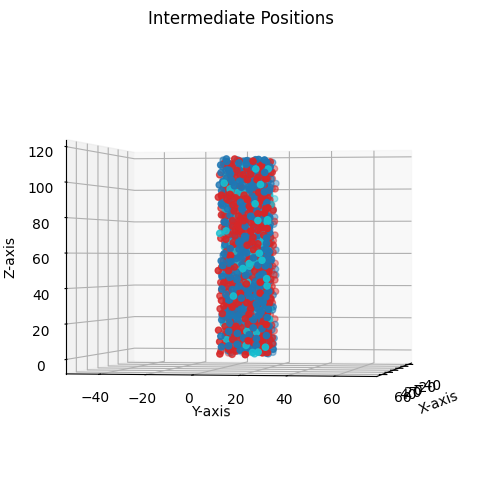

In [346]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

khist_index = 1

# Load initial position data
initial_position_data = np.loadtxt("q4/time4000.d")
x_init = initial_position_data[:, 2]
y_init = initial_position_data[:, 3]
z_init = initial_position_data[:, 4]

pcle_id = initial_position_data[:, khist_index]  # Discrete values for coloring

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapping based on pcle_id
sc = ax.scatter(x_init, y_init, z_init, c=pcle_id, cmap='tab10', marker='o')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Intermediate Positions')

# Set equal aspect ratio
def set_axes_equal(ax):
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()
    
    x_range = x_limits[1] - x_limits[0]
    y_range = y_limits[1] - y_limits[0]
    z_range = z_limits[1] - z_limits[0]
    
    max_range = max(x_range, y_range, z_range)
    
    mid_x = np.mean(x_limits)
    mid_y = np.mean(y_limits)
    mid_z = np.mean(z_limits)
    
    ax.set_xlim3d([mid_x - max_range / 2, mid_x + max_range / 2])
    ax.set_ylim3d([mid_y - max_range / 2, mid_y + max_range / 2])
    ax.set_zlim3d([mid_z - max_range / 2, mid_z + max_range / 2])

set_axes_equal(ax)

# Function to update the view angle
def update(num):
    ax.view_init(elev=0, azim=10)
    return sc,

ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=100, blit=True)

plt.show()

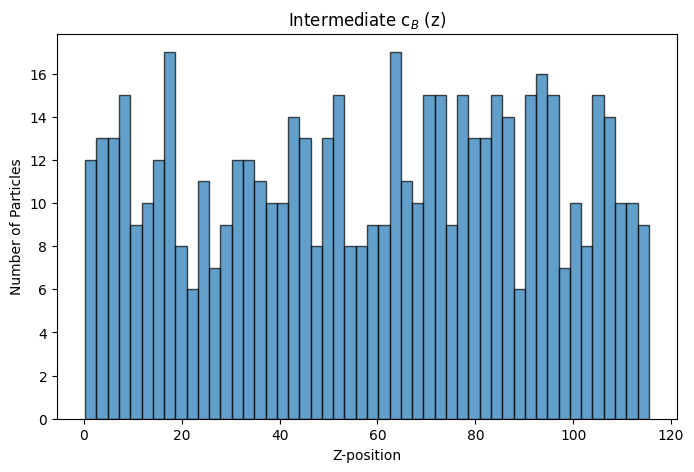

In [350]:
import numpy as np
import matplotlib.pyplot as plt

khist_index = 1

# Load initial position data
initial_position_data = np.loadtxt("q4/time4000.d")
z_init = initial_position_data[:, 4]  # Extract z-coordinates
pcle_id = initial_position_data[:, khist_index]  # KHIST values

# Filter for KHIST = 1
z_filtered = z_init[pcle_id == 1]

# Create histogram
plt.figure(figsize=(8, 5))
plt.hist(z_filtered, bins=50, edgecolor='black', alpha=0.7)  # Adjust bin count as needed

# Labels and title
plt.xlabel('Z-position')
plt.ylabel('Number of Particles')
plt.title(r'Intermediate c$_B$ (z)')

# Show plot
plt.show()


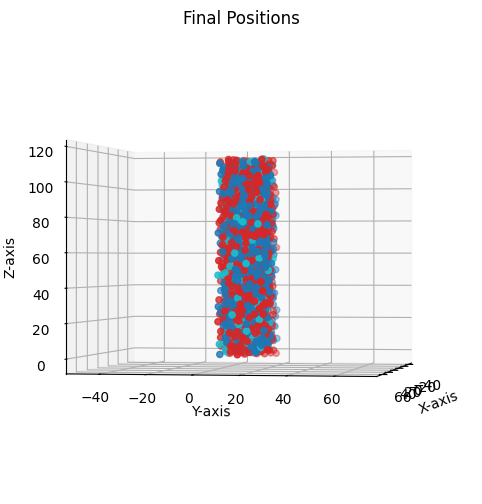

In [351]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

khist_index = 1

#9992

# Load initial position data
final_position_data = np.loadtxt("q4/time8504.d")
x_init = final_position_data[:, 2]
y_init = final_position_data[:, 3]
z_init = final_position_data[:, 4]

pcle_id = final_position_data[:, khist_index]  # Discrete values for coloring

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapping based on pcle_id
sc = ax.scatter(x_init, y_init, z_init, c=pcle_id, cmap='tab10', marker='o')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Final Positions')

# Set equal aspect ratio
def set_axes_equal(ax):
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()
    
    x_range = x_limits[1] - x_limits[0]
    y_range = y_limits[1] - y_limits[0]
    z_range = z_limits[1] - z_limits[0]
    
    max_range = max(x_range, y_range, z_range)
    
    mid_x = np.mean(x_limits)
    mid_y = np.mean(y_limits)
    mid_z = np.mean(z_limits)
    
    ax.set_xlim3d([mid_x - max_range / 2, mid_x + max_range / 2])
    ax.set_ylim3d([mid_y - max_range / 2, mid_y + max_range / 2])
    ax.set_zlim3d([mid_z - max_range / 2, mid_z + max_range / 2])

set_axes_equal(ax)

# Function to update the view angle
def update(num):
    ax.view_init(elev=0, azim=10)
    return sc,

ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=100, blit=True)

plt.show()

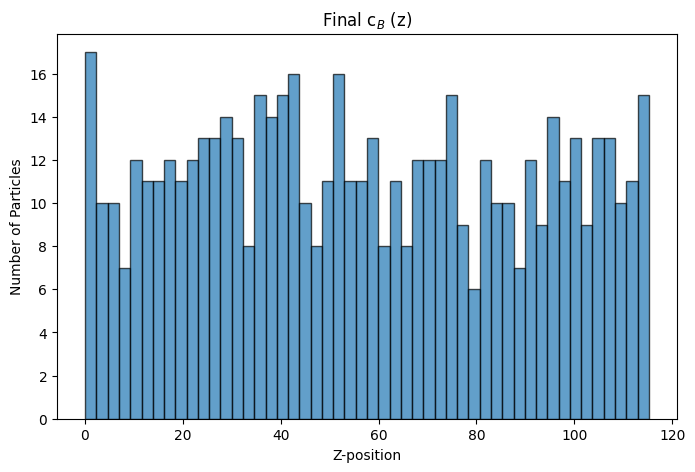

In [352]:
import numpy as np
import matplotlib.pyplot as plt

khist_index = 1

# Load initial position data
initial_position_data = np.loadtxt("q4/time8504.d")
z_init = initial_position_data[:, 4]  # Extract z-coordinates
pcle_id = initial_position_data[:, khist_index]  # KHIST values

# Filter for KHIST = 1
z_filtered = z_init[pcle_id == 1]

# Create histogram
plt.figure(figsize=(8, 5))
plt.hist(z_filtered, bins=50, edgecolor='black', alpha=0.7)  # Adjust bin count as needed

# Labels and title
plt.xlabel('Z-position')
plt.ylabel('Number of Particles')
plt.title(r'Final c$_B$ (z)')

# Show plot
plt.show()
